**Sentiment analysis on IMBD movie reviews dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [46]:
pd.set_option('display.max_colwidth',None)

**Importing the dataset**

In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

IMDB dataset have 50K movie reviews labelled as positive and negative sentiments.

**Dataset description**

In [49]:
df.head(10)

,review,sentiment
0,"one review ha mention watch 1 Oz episod ' hooked. right , thi exactli happen me.th first thing struck Oz wa brutal unflinch scene violence , set right word go. trust , thi show faint heart timid. thi show pull punch regard drugs , sex violence. hardcore , classic use word.it call OZ nicknam given oswald maximum secur state penitentary. focus mainli emerald city , experiment section prison cell glass front face inwards , privaci high agenda. Em citi home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show ' dare. forget pretti pictur paint mainstream audiences , forget charm , forget romance ... oz ' mess around. first episod ever saw struck nasti wa surreal , ' say wa readi , watch , develop tast oz , got accustom high level graphic violence. violence , injustic ( crook guard ' sold nickel , inmat ' kill order get away , well mannered , middl class inmat turn prison bitch due lack street skill prison experience ) watch oz , may becom comfort uncomfort viewing .... get touch darker side .",positive
1,"wonder littl production. film techniqu veri unassuming- veri old-time-bbc fashion give comforting , sometim discomforting , sens realism entir piece. actor extrem well chosen- michael sheen onli "" ha got polari "" ha voic pat ! truli see seamless edit guid refer williams ' diari entries , onli well worth watch terrificli written perform piece. master product one great master ' comedi hi life. realism realli come home littl things : fantasi guard , rather use tradit ' dream ' techniqu remain solid disappears. play knowledg senses , particularli scene concern orton halliwel set ( particularli flat halliwell ' mural decor everi surface ) terribl well done .",positive
2,"thought thi wa wonder way spend time hot summer weekend , sit air condit theater watch light-heart comedy. plot simplistic , dialogu witti charact likabl ( even well bread suspect serial killer ) . may disappoint realiz thi match point 2 : risk addiction , thought wa proof woodi allen still fulli control style mani us grown love.thi wa ' laugh one woody ' comedi year ( dare say decade ? ) . ' v never impress scarlet johanson , thi manag tone "" sexy "" imag jump right average , spirit young woman.thi may crown jewel hi career , wa wittier "" devil wear prada "" interest "" superman "" great comedi go see friends .",positive
3,"basic ' famili littl boy ( jake ) think ' zombi hi closet &amp; hi parent fight time.thi movi slower soap opera ... suddenly , jake decid becom rambo kill zombie.ok , first ' r go make film must decid thriller drama ! drama movi watchable. parent divorc &amp; argu like real life. jake hi closet total ruin film ! expect see boogeyman similar movie , instead watch drama meaningless thriller spots.3 10 well play parent &amp; descent dialogs. shot jake : ignor .",negative
4,"petter mattei ' "" love time money "" visual stun film watch. mr. mattei offer us vivid portrait human relations. thi movi seem tell us money , power success peopl differ situat encounter. thi variat arthur schnitzler ' play theme , director transfer action present time new york differ charact meet connect. one connect one way , anoth next person , one seem know previou point contact. stylishly , film ha sophist luxuri look. taken see peopl live world live habitat.th onli thing one get soul pictur differ stage loneli one inhabits. big citi exactli best place human relat find sincer fulfillment , one discern case peopl encounter.th act good mr. mattei ' direction. steve buscemi , rosario dawson , carol kane , michael imperioli , adrian grenier , rest talent cast , make charact come alive.w wish mr. mattei good luck await anxious hi next work .",positive
5,"probabl all-tim favorit movie , stori selflessness , sacrific dedic nobl cause , ' preachi boring. never get old , despit seen 15 time last 25 years. paul lukas 

In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

This means we have a balanced dataset

**Load the libraries**

In [6]:

#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Removing HTML & Noise**

In [7]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

/tmp/ipykernel_32/204301372.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [50]:
df.head(10)

,review,sentiment
0,"one review ha mention watch 1 Oz episod ' hooked. right , thi exactli happen me.th first thing struck Oz wa brutal unflinch scene violence , set right word go. trust , thi show faint heart timid. thi show pull punch regard drugs , sex violence. hardcore , classic use word.it call OZ nicknam given oswald maximum secur state penitentary. focus mainli emerald city , experiment section prison cell glass front face inwards , privaci high agenda. Em citi home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show ' dare. forget pretti pictur paint mainstream audiences , forget charm , forget romance ... oz ' mess around. first episod ever saw struck nasti wa surreal , ' say wa readi , watch , develop tast oz , got accustom high level graphic violence. violence , injustic ( crook guard ' sold nickel , inmat ' kill order get away , well mannered , middl class inmat turn prison bitch due lack street skill prison experience ) watch oz , may becom comfort uncomfort viewing .... get touch darker side .",positive
1,"wonder littl production. film techniqu veri unassuming- veri old-time-bbc fashion give comforting , sometim discomforting , sens realism entir piece. actor extrem well chosen- michael sheen onli "" ha got polari "" ha voic pat ! truli see seamless edit guid refer williams ' diari entries , onli well worth watch terrificli written perform piece. master product one great master ' comedi hi life. realism realli come home littl things : fantasi guard , rather use tradit ' dream ' techniqu remain solid disappears. play knowledg senses , particularli scene concern orton halliwel set ( particularli flat halliwell ' mural decor everi surface ) terribl well done .",positive
2,"thought thi wa wonder way spend time hot summer weekend , sit air condit theater watch light-heart comedy. plot simplistic , dialogu witti charact likabl ( even well bread suspect serial killer ) . may disappoint realiz thi match point 2 : risk addiction , thought wa proof woodi allen still fulli control style mani us grown love.thi wa ' laugh one woody ' comedi year ( dare say decade ? ) . ' v never impress scarlet johanson , thi manag tone "" sexy "" imag jump right average , spirit young woman.thi may crown jewel hi career , wa wittier "" devil wear prada "" interest "" superman "" great comedi go see friends .",positive
3,"basic ' famili littl boy ( jake ) think ' zombi hi closet &amp; hi parent fight time.thi movi slower soap opera ... suddenly , jake decid becom rambo kill zombie.ok , first ' r go make film must decid thriller drama ! drama movi watchable. parent divorc &amp; argu like real life. jake hi closet total ruin film ! expect see boogeyman similar movie , instead watch drama meaningless thriller spots.3 10 well play parent &amp; descent dialogs. shot jake : ignor .",negative
4,"petter mattei ' "" love time money "" visual stun film watch. mr. mattei offer us vivid portrait human relations. thi movi seem tell us money , power success peopl differ situat encounter. thi variat arthur schnitzler ' play theme , director transfer action present time new york differ charact meet connect. one connect one way , anoth next person , one seem know previou point contact. stylishly , film ha sophist luxuri look. taken see peopl live world live habitat.th onli thing one get soul pictur differ stage loneli one inhabits. big citi exactli best place human relat find sincer fulfillment , one discern case peopl encounter.th act good mr. mattei ' direction. steve buscemi , rosario dawson , carol kane , michael imperioli , adrian grenier , rest talent cast , make charact come alive.w wish mr. mattei good luck await anxious hi next work .",positive
5,"probabl all-tim favorit movie , stori selflessness , sacrific dedic nobl cause , ' preachi boring. never get old , despit seen 15 time last 25 years. paul lukas 

**Text stemming**

In [9]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

In [51]:
df.head(10)

,review,sentiment
0,"one review ha mention watch 1 Oz episod ' hooked. right , thi exactli happen me.th first thing struck Oz wa brutal unflinch scene violence , set right word go. trust , thi show faint heart timid. thi show pull punch regard drugs , sex violence. hardcore , classic use word.it call OZ nicknam given oswald maximum secur state penitentary. focus mainli emerald city , experiment section prison cell glass front face inwards , privaci high agenda. Em citi home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show ' dare. forget pretti pictur paint mainstream audiences , forget charm , forget romance ... oz ' mess around. first episod ever saw struck nasti wa surreal , ' say wa readi , watch , develop tast oz , got accustom high level graphic violence. violence , injustic ( crook guard ' sold nickel , inmat ' kill order get away , well mannered , middl class inmat turn prison bitch due lack street skill prison experience ) watch oz , may becom comfort uncomfort viewing .... get touch darker side .",positive
1,"wonder littl production. film techniqu veri unassuming- veri old-time-bbc fashion give comforting , sometim discomforting , sens realism entir piece. actor extrem well chosen- michael sheen onli "" ha got polari "" ha voic pat ! truli see seamless edit guid refer williams ' diari entries , onli well worth watch terrificli written perform piece. master product one great master ' comedi hi life. realism realli come home littl things : fantasi guard , rather use tradit ' dream ' techniqu remain solid disappears. play knowledg senses , particularli scene concern orton halliwel set ( particularli flat halliwell ' mural decor everi surface ) terribl well done .",positive
2,"thought thi wa wonder way spend time hot summer weekend , sit air condit theater watch light-heart comedy. plot simplistic , dialogu witti charact likabl ( even well bread suspect serial killer ) . may disappoint realiz thi match point 2 : risk addiction , thought wa proof woodi allen still fulli control style mani us grown love.thi wa ' laugh one woody ' comedi year ( dare say decade ? ) . ' v never impress scarlet johanson , thi manag tone "" sexy "" imag jump right average , spirit young woman.thi may crown jewel hi career , wa wittier "" devil wear prada "" interest "" superman "" great comedi go see friends .",positive
3,"basic ' famili littl boy ( jake ) think ' zombi hi closet &amp; hi parent fight time.thi movi slower soap opera ... suddenly , jake decid becom rambo kill zombie.ok , first ' r go make film must decid thriller drama ! drama movi watchable. parent divorc &amp; argu like real life. jake hi closet total ruin film ! expect see boogeyman similar movie , instead watch drama meaningless thriller spots.3 10 well play parent &amp; descent dialogs. shot jake : ignor .",negative
4,"petter mattei ' "" love time money "" visual stun film watch. mr. mattei offer us vivid portrait human relations. thi movi seem tell us money , power success peopl differ situat encounter. thi variat arthur schnitzler ' play theme , director transfer action present time new york differ charact meet connect. one connect one way , anoth next person , one seem know previou point contact. stylishly , film ha sophist luxuri look. taken see peopl live world live habitat.th onli thing one get soul pictur differ stage loneli one inhabits. big citi exactli best place human relat find sincer fulfillment , one discern case peopl encounter.th act good mr. mattei ' direction. steve buscemi , rosario dawson , carol kane , michael imperioli , adrian grenier , rest talent cast , make charact come alive.w wish mr. mattei good luck await anxious hi next work .",positive
5,"probabl all-tim favorit movie , stori selflessness , sacrific dedic nobl cause , ' preachi boring. never get old , despit seen 15 time last 25 years. paul lukas 

**Text tokenization & removal of stop words**

In [11]:
stopwords = nltk.corpus.stopwords.words('english')

In [12]:
tokenizer = ToktokTokenizer()
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

In [52]:
df.head()

,review,sentiment
0,"one review ha mention watch 1 Oz episod ' hooked. right , thi exactli happen me.th first thing struck Oz wa brutal unflinch scene violence , set right word go. trust , thi show faint heart timid. thi show pull punch regard drugs , sex violence. hardcore , classic use word.it call OZ nicknam given oswald maximum secur state penitentary. focus mainli emerald city , experiment section prison cell glass front face inwards , privaci high agenda. Em citi home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show ' dare. forget pretti pictur paint mainstream audiences , forget charm , forget romance ... oz ' mess around. first episod ever saw struck nasti wa surreal , ' say wa readi , watch , develop tast oz , got accustom high level graphic violence. violence , injustic ( crook guard ' sold nickel , inmat ' kill order get away , well mannered , middl class inmat turn prison bitch due lack street skill prison experience ) watch oz , may becom comfort uncomfort viewing .... get touch darker side .",positive
1,"wonder littl production. film techniqu veri unassuming- veri old-time-bbc fashion give comforting , sometim discomforting , sens realism entir piece. actor extrem well chosen- michael sheen onli "" ha got polari "" ha voic pat ! truli see seamless edit guid refer williams ' diari entries , onli well worth watch terrificli written perform piece. master product one great master ' comedi hi life. realism realli come home littl things : fantasi guard , rather use tradit ' dream ' techniqu remain solid disappears. play knowledg senses , particularli scene concern orton halliwel set ( particularli flat halliwell ' mural decor everi surface ) terribl well done .",positive
2,"thought thi wa wonder way spend time hot summer weekend , sit air condit theater watch light-heart comedy. plot simplistic , dialogu witti charact likabl ( even well bread suspect serial killer ) . may disappoint realiz thi match point 2 : risk addiction , thought wa proof woodi allen still fulli control style mani us grown love.thi wa ' laugh one woody ' comedi year ( dare say decade ? ) . ' v never impress scarlet johanson , thi manag tone "" sexy "" imag jump right average , spirit young woman.thi may crown jewel hi career , wa wittier "" devil wear prada "" interest "" superman "" great comedi go see friends .",positive
3,"basic ' famili littl boy ( jake ) think ' zombi hi closet &amp; hi parent fight time.thi movi slower soap opera ... suddenly , jake decid becom rambo kill zombie.ok , first ' r go make film must decid thriller drama ! drama movi watchable. parent divorc &amp; argu like real life. jake hi closet total ruin film ! expect see boogeyman similar movie , instead watch drama meaningless thriller spots.3 10 well play parent &amp; descent dialogs. shot jake : ignor .",negative
4,"petter mattei ' "" love time money "" visual stun film watch. mr. mattei offer us vivid portrait human relations. thi movi seem tell us money , power success peopl differ situat encounter. thi variat arthur schnitzler ' play theme , director transfer action present time new york differ charact meet connect. one connect one way , anoth next person , one seem know previou point contact. stylishly , film ha sophist luxuri look. taken see peopl live world live habitat.th onli thing one get soul pictur differ stage loneli one inhabits. big citi exactli best place human relat find sincer fulfillment , one discern case peopl encounter.th act good mr. mattei ' direction. steve buscemi , rosario dawson , carol kane , michael imperioli , adrian grenier , rest talent cast , make charact come alive.w wish mr. mattei good luck await anxious hi next work .",positive


**Split the data into Train and Test with 40K datapoints in train and 10K in test**

In [14]:
train_reviews = df.review[:40000]
train_reviews.shape

(40000,)

In [15]:
test_reviews = df.review[40000:]
test_reviews.shape

(10000,)

In [48]:
train_reviews.head(5)

0    one review ha mention watch 1 Oz episod ' hooked. right , thi exactli happen me.th first thing struck Oz wa brutal unflinch scene violence , set right word go. trust , thi show faint heart timid. thi show pull punch regard drugs , sex violence. hardcore , classic use word.it call OZ nicknam given oswald maximum secur state penitentary. focus mainli emerald city , experiment section prison cell glass front face inwards , privaci high agenda. Em citi home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show ' dare. forget pretti pictur paint mainstream audiences , forget charm , forget romance ... oz ' mess around. first episod ever saw struck nasti wa surreal , ' say wa readi , watch , develop tast oz , got accustom high level graphic violence. violence , injustic ( crook guard ' sold nickel , inmat ' kill order get away , well mannered , 

**Bag of words embedding**

In [17]:
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
bow_train_reviews = cv.fit_transform(train_reviews)
bow_test_reviews = cv.transform(test_reviews)

print('BOW_cv_train:',bow_train_reviews.shape)
print('BOW_cv_test:',bow_test_reviews.shape)

BOW_cv_train: (40000, 6369574)
BOW_cv_test: (10000, 6369574)


**TFIDF word embedding**

In [18]:
tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tfidf_train_reviews = tv.fit_transform(train_reviews)
tfidf_test_reviews = tv.transform(test_reviews)

print('Tfidf_train:',tfidf_train_reviews.shape)
print('Tfidf_test:',tfidf_test_reviews.shape)

Tfidf_train: (40000, 6369574)
Tfidf_test: (10000, 6369574)


**Labelling the sentiment data**

In [19]:
lb = LabelBinarizer()
sentiment_data = pd.DataFrame(lb.fit_transform(df.sentiment))
print(sentiment_data.shape)

(50000, 1)


In [20]:
train_sentiments = sentiment_data[:40000]
train_sentiments.shape

(40000, 1)

In [21]:
test_sentiments = sentiment_data[40000:]
test_sentiments.shape

(10000, 1)

**Logistic Regression**

In [22]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(bow_train_reviews,train_sentiments)
print(lr_bow)
lr_tfidf = lr.fit(tfidf_train_reviews,train_sentiments)
print(lr_tfidf)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


**Making prediction using Logistic regression**

In [54]:
print('bag of words')
lr_bow_predict=lr.predict(bow_test_reviews)
print(lr_bow_predict)
print('tfidf features')
lr_tfidf_predict=lr.predict(tfidf_test_reviews)
print(lr_tfidf_predict)

bag of words
[0 0 0 ... 0 1 1]
tfidf features
[0 0 0 ... 0 1 1]


**Checking the accuracy**

In [53]:
print('Accuracy for bag of words')
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
print('Accuracy for tfidf features')
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

Accuracy for bag of words
lr_bow_score : 0.7522
Accuracy for tfidf features
lr_tfidf_score : 0.752


In [55]:
print('Classification report for bag of words') 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

print('Classification report for tfidf features')
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

Classification report for bag of words
              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.76      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

Classification report for tfidf features
              precision    recall  f1-score   support

    Positive       0.74      0.77      0.76      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



Confusion matrix for BOW


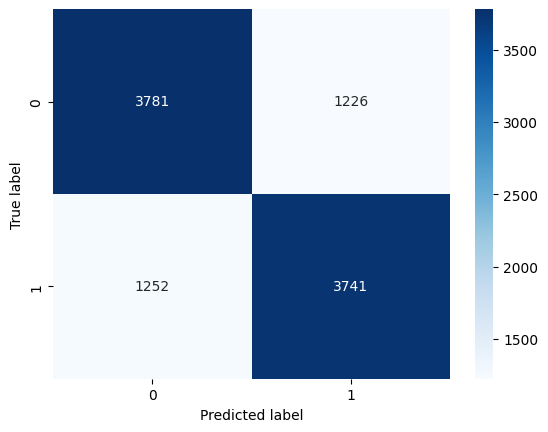

Confusion matrix for TFIDF features


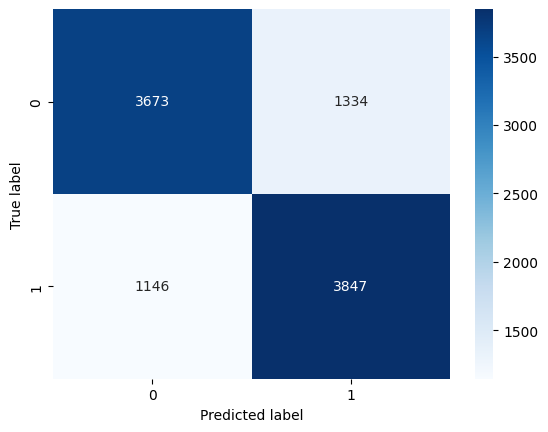

In [63]:
print('Confusion matrix for BOW')
cm_bow = confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print('Confusion matrix for TFIDF features')
cm_tfidf = confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**SVM**

In [27]:
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
svm_bow=svm.fit(bow_train_reviews,train_sentiments)
print(svm_bow)

svm_tfidf=svm.fit(tfidf_train_reviews,train_sentiments)
print(svm_tfidf)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [57]:
print('Predicting the model for bag of words')
svm_bow_predict=svm.predict(bow_test_reviews)
print(svm_bow_predict)

print('Predicting the model for tfidf features')
svm_tfidf_predict=svm.predict(tfidf_test_reviews)
print(svm_tfidf_predict)

Predicting the model for bag of words
[1 0 1 ... 1 1 1]
Predicting the model for tfidf features
[1 1 1 ... 1 1 1]


In [58]:
print('Accuracy score for bag of words')
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

print('Accuracy score for tfidf features')
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

Accuracy score for bag of words
svm_bow_score : 0.5835
Accuracy score for tfidf features
svm_tfidf_score : 0.5111


Confusion matrix for BOW


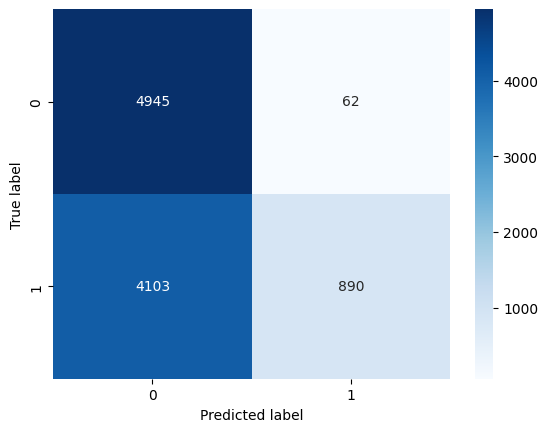

confusion matrix for TFIDF features


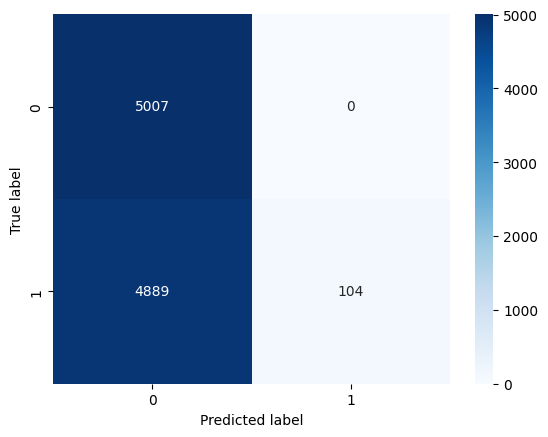

In [62]:
print('Confusion matrix for BOW')
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


print('confusion matrix for TFIDF features')
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**LSTM**

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(train_reviews)
word_index = tokenizer.word_index

V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  91926


In [32]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(train_reviews)
seq_test =  tokenizer.texts_to_sequences(test_reviews)

In [33]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1538


In [34]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 342


In [64]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number covers approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number covers approximately 94.56 % of data


So we can use this number for our maxlen parameter.

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#create padded sequences
pad_train=pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [37]:
from sklearn.model_selection import train_test_split
#Splitting training set for validation purposes
Xtrain,Xval,ytrain,yval=train_test_split(pad_train,train_sentiments,test_size=0.2,random_state=10)

In [38]:
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs

In [39]:
D = 64 #embedding dims
epochs = 5
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_seq_len,epochs)

----Building the model----
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 342)]             0         
                                                                 
 embedding (Embedding)       (None, 342, 64)           5883328   
                                                                 
 batch_normalization (BatchN  (None, 342, 64)          256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 342, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 338, 32)           10272     
                                                                 
 dropout_1 (Dropout)         (None, 338, 32)           0         
                                  

In [41]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,test_sentiments)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
313/313 [==============================] - 5s 14ms/step - loss: 0.3484 - accuracy: 0.8908
{'loss': 0.34842371940612793, 'accuracy': 0.8907999992370605}


313/313 [==============================] - 5s 12ms/step


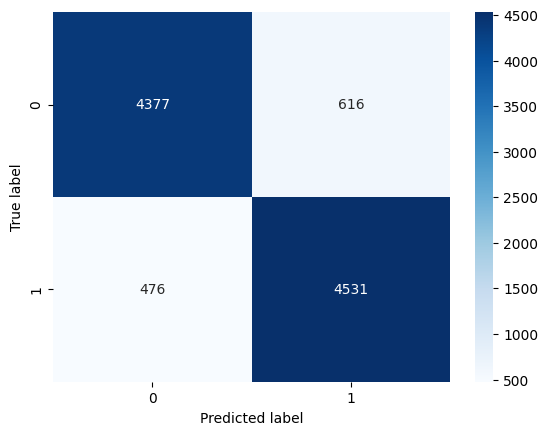

In [42]:
#Generate predictions for the test dataset
ypred = model.predict(pad_test)
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(test_sentiments, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**Conclusion**

- Logistic Regression
    - Accuracy : 75.2% for both BOW and TFIDF
- SVM
    - Accuracy : 58.1% with BOW and 51.1 % with TFIDF
- LSTM
    - Accuracy : 89.0%

LSTM performed best with 89% accuracy because LSTMs are able to capture long term dependencies and works well with long strings of text.


**Further enhancements**

- Attention based model like transformers may have worked better and given a better accuracy as compare to LSTM, so that enhancement can be done.